<a href="https://colab.research.google.com/github/Chetan-Sagathiya/Twitter_Sentiment_Analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/ml_datasets/twitter_sentiment_dataset/train.csv")
test_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0    29720
1     2242
Name: label, dtype: int64


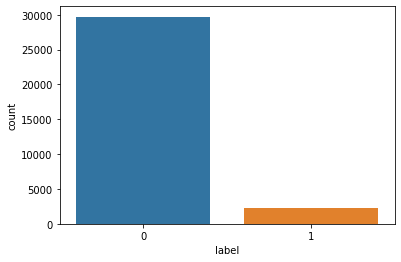

In [ ]:
print(test_data['label'].value_counts())
sns.countplot(data = test_data, x= 'label')
plt.show()

In [ ]:
test_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
wordnet = WordNetLemmatizer()
def clean_tweets(df):
  tempArr = []
  for lines in df:
    #tweet = re.sub('[^a-zA-Z]', ' ', lines)
    tweet = re.sub(r"[^a-zA-Z]+", ' ', lines)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [wordnet.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
    if len(tweet) == 0:
      # if all the words im tweet are stopwords then
      tweet = 'I'
    else:
      tweet = ' '.join(tweet)
    tweet
    tempArr.append(tweet)
  return tempArr

In [ ]:
cleaned_tweets = clean_tweets(test_data['tweet']) 
cleaned_tweets = pd.DataFrame(cleaned_tweets, columns = ['cleaned_tweets'])
cleaned_tweets

,cleaned_tweets
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [ ]:
test_data = pd.concat([test_data, cleaned_tweets], axis=1)
data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
def get_vec(tweet):
  vec = nlp(tweet).vector
  return vec

In [ ]:
vec = get_vec("chetan is best")
vec.shape

(96,)

In [ ]:
test_data['vector'] = test_data['cleaned_tweets'].apply(lambda x: get_vec(x))
test_data.head()

,id,label,tweet,cleaned_tweets,vector
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...,"[0.4842372, -0.06366028, -1.8760673, 1.5139647..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...,"[0.25390026, 0.040692586, -0.7003227, 1.487928..."
2,3,0,bihday your majesty,bihday majesty,"[1.5038044, -3.6027033, 0.57702637, 1.0233208,..."
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,"[0.50754863, -1.1472391, 0.3886793, -0.3016174..."
4,5,0,factsguide: society now #motivation,factsguide society motivation,"[1.001973, -1.840333, -1.8968383, 0.4452219, 0..."


In [ ]:
X_train = test_data['vector'].to_numpy()
X_train = X_train.reshape(-1, 1)
X_train.shape
#3352, 4412, 7223, 10462, 13039, 15435, 16251, 20262, 22710, 23515, 25630, 29804, 31782]

(31962, 1)

In [ ]:
value = test_data[test_data['id'] == 3352]['tweet']
word = test_data.iloc[3351]['tweet']

In [ ]:
tweet = re.sub(r"[^a-zA-Z]+", ' ', word)
tweet = tweet.lower()
tweet = tweet.split()
tweet = [wordnet.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
if len(tweet) == 0:
  tweet = 'positive'
else:
  tweet = ' '.join(tweet)
tweet

'positive'

In [ ]:
print(re.sub('[^A-Za-z]', ' ', word))
print(re.sub('[^a-zA-Z]+', ' ', word))
print(re.sub(r"[^a-zA-Z]+", ' ', word))


what i do     
what i do 
what i do 


In [ ]:
X_train = np.concatenate(np.concatenate(X_train, axis=0), axis=0).reshape(-1, 96)
X_train.shape

(31962, 96)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {
    'alpha': [1, 1e-1, 1e-2, 1e-4, 1e-5, 1e-7, 1e-8, 1e-10]
}

In [ ]:
clf = MultinomialNB()
tuning = GridSearchCV(clf, grid_params, cv=5)

In [ ]:
tuning.fit(X_train,test_data['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFa

ValueError: ignored